## TOC:
* [Reading and analysing the data](#analysis)
* [Create smaller dataset](#smaller)
* [Preparing the data](#preparing)
* [Training the models](#training)
    * [Decision Tree](#dt)
    * [Neural Networks](#nn)
    * [K-NN](#knn)
    * [SVM](#svm)
* [Training models with less data](#training2)
    * [Decision Tree](#dt2)
    * [Neural Networks](#nn2)
    * [K-NN](#knn2)    


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

## Reading and analysing the data <a class="anchor" id="analysis"></a>

In [2]:
credit_card_data = pd.read_csv('card_transdata.csv', na_values=['NA'])
credit_card_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
credit_card_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Frequency')

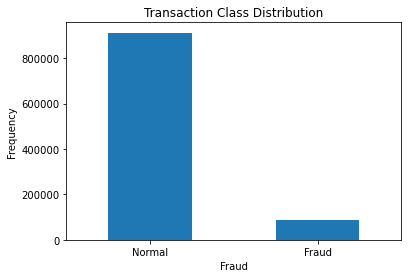

In [4]:
count_frauds = pd.value_counts(credit_card_data['fraud'], sort = True)

count_frauds.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

LABELS = ["Normal", "Fraud"]

plt.xticks(range(2), LABELS)

plt.xlabel("Fraud")

plt.ylabel("Frequency")

In [5]:
fraud = credit_card_data[credit_card_data['fraud']==1]

normal = credit_card_data[credit_card_data['fraud']==0]

print(normal.shape, fraud.shape)

(912597, 8) (87403, 8)


In [6]:
fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


In [7]:
normal.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.0
mean,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225,0.0
std,52.828655,22.472359,1.946152,0.322997,0.479825,0.312821,0.484831,0.0
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.828942,0.293859,0.449768,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.673847,0.985074,0.913950,1.000000,0.000000,0.000000,1.000000,0.0
75%,24.158057,3.268578,1.788918,1.000000,1.000000,0.000000,1.000000,0.0
max,8777.136420,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,0.0


### Create smaller dataset <a class="anchor" id="smaller"></a>

In [8]:
training_data = credit_card_data.sample(frac = 0.1,random_state=1)

training_data.shape

(100000, 8)

In [9]:
fraud = training_data[training_data['fraud']==1]

valid = training_data[training_data['fraud']==0]

outlier_fraction = len(fraud)/float(len(valid))

print(outlier_fraction)

print("Fraud Cases : {}".format(len(fraud)))

print("Valid Cases : {}".format(len(valid)))

0.09674376775353974
Fraud Cases : 8821
Valid Cases : 91179


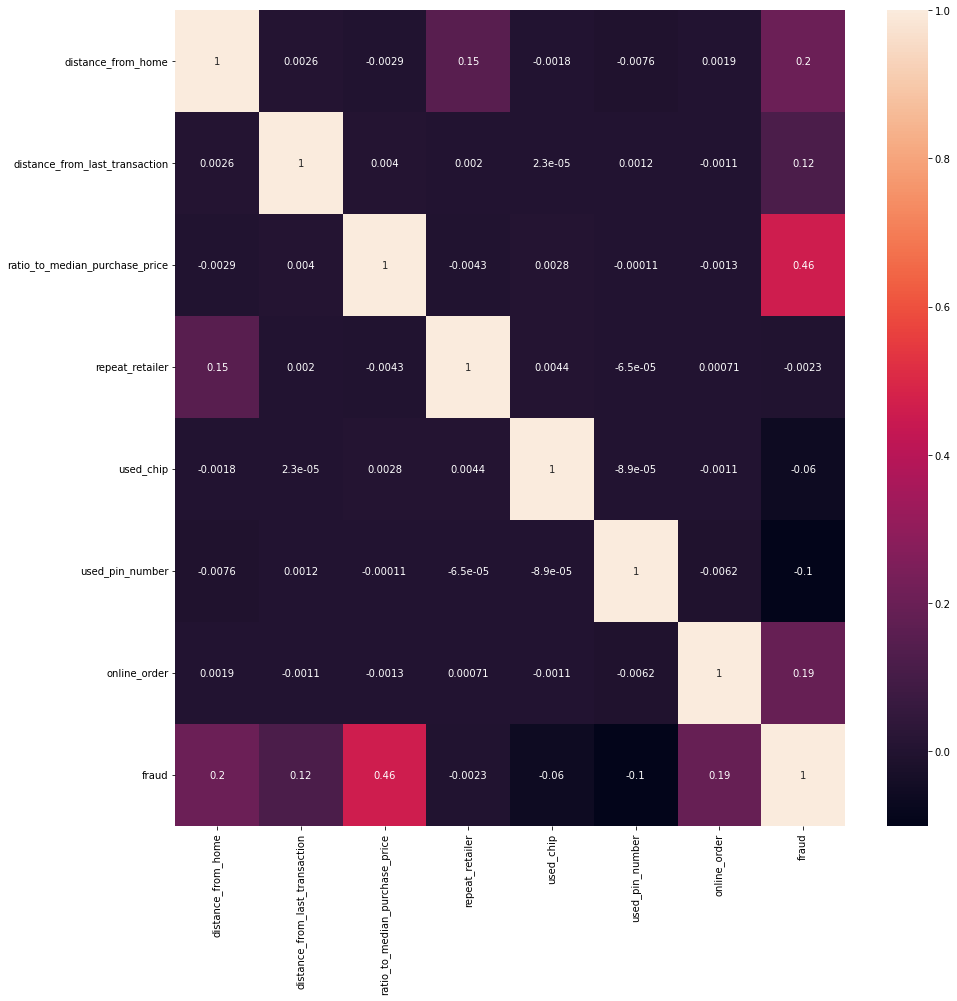

In [10]:
correlation_matrix = training_data.corr()

top_corr_features = correlation_matrix.index

plt.figure(figsize=(15,15))
#plot heat map
g=sb.heatmap(training_data[top_corr_features].corr(),annot=True)



## Preparing the data <a class="anchor" id="preparing"></a>

In [11]:
columns = list(training_data.columns.values)

# filter the columns (remove the labels)
columns = [c for c in columns if c not in ["fraud"]]

X = credit_card_data[columns]

X_positive_corr = credit_card_data[["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price", "online_order"]]

Y = credit_card_data["fraud"]

print(X.shape, Y.shape)

print(X_positive_corr.shape, Y.shape)

(1000000, 7) (1000000,)
(1000000, 4) (1000000,)


In [12]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X, Y, test_size=0.75, random_state=1)

print(X_train.shape, X_test.shape)

(X_corr_train,
 X_corr_test,
 y_corr_train,
 y_corr_test) = train_test_split(X_positive_corr, Y, test_size=0.75, random_state=1)

(250000, 7) (750000, 7)


Under sample

In [13]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)

new_fraud = y_res[y_res==1]

new_valid = y_res[y_res==0]

old_fraud = y_train[y_train==1]

old_valid = y_train[y_train==0]

print("New number of fraud cases is" , new_fraud.shape, "and number of valid cases is", new_valid.shape)
print("Old number of fraud cases is" , old_fraud.shape, "and number of valid cases is", old_valid.shape)



New number of fraud cases is (21853,) and number of valid cases is (21853,)
Old number of fraud cases is (21853,) and number of valid cases is (228147,)


## Training models <a class="anchor" id="training"></a>
We will use the follwing:
- Decision Tree
- Neural Networks
- K-NN

### Decision Tree <a class="anchor" id="dt"></a>

In [14]:
from sklearn.tree import DecisionTreeClassifier
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

#### Balanced Dataset

In [15]:
# Train the classifier on the training set
decision_tree_classifier.fit(X_res, y_res)

y_pred = decision_tree_classifier.predict(X_test)

In [16]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))



Confusion matrix:
 [[684264    186]
 [     7  65543]]
F1: 0.9985298486429665
Accuracy: 0.9997426666666667


#### Inbalanced Dataset

- All attributes

In [17]:
decision_tree_classifier.fit(X_train, y_train)

y_pred = decision_tree_classifier.predict(X_test)

In [18]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[684436     14]
 [    28  65522]]
F1: 0.9996795996521368
Accuracy: 0.999944


- Positive correlation attributes

In [19]:
decision_tree_classifier.fit(X_corr_train, y_corr_train)

y_corr_pred = decision_tree_classifier.predict(X_corr_test)

In [20]:
print("Confusion matrix:\n", confusion_matrix(y_corr_test, y_corr_pred))

print("F1:", f1_score(y_corr_test, y_corr_pred))

print("Accuracy:", accuracy_score(y_corr_test, y_corr_pred))

Confusion matrix:
 [[672484  11966]
 [ 12418  53132]]
F1: 0.8133610924009552
Accuracy: 0.967488


#### Roc Curve

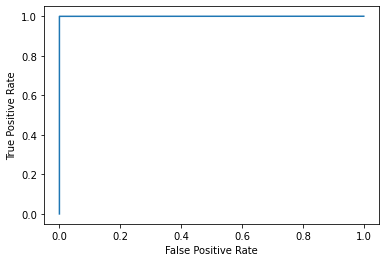

In [21]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Neural Networks <a class="anchor" id="nn"></a>

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

#mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=100)
#mlp = MLPClassifier(hidden_layer_sizes=(100,15), activation='relu', solver='adam', max_iter=200)
#mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=200)
#mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), activation='relu', solver='adam', max_iter=200)
mlp = MLPClassifier(hidden_layer_sizes=(20,20), activation='relu', solver='adam', max_iter=200)

#### Balanced Dataset

In [23]:
mlp.fit(X_res,y_res)

y_pred = mlp.predict(X_test)

In [24]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[674372  10078]
 [   110  65440]]
F1: 0.927779510590637
Accuracy: 0.986416


#### Inbalanced Dataset

- All attributes

In [25]:
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

In [26]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[683795    655]
 [   977  64573]]
F1: 0.9875208368380003
Accuracy: 0.997824


- Positive correlation attributes

In [27]:
mlp.fit(X_corr_train,y_corr_train)

y_corr_pred = mlp.predict(X_corr_test)

In [28]:
print("Confusion matrix:\n", confusion_matrix(y_corr_test, y_corr_pred))

print("F1:", f1_score(y_corr_test, y_corr_pred))

print("Accuracy:", accuracy_score(y_corr_test, y_corr_pred))

Confusion matrix:
 [[669146  15304]
 [  4161  61389]]
F1: 0.8631567106992962
Accuracy: 0.9740466666666666


#### Roc Curve

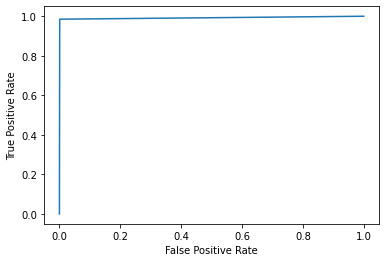

In [29]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## K-NN <a class="anchor" id="knn"></a>

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

#### Balanced Dataset

In [31]:
knn.fit(X_res, y_res)

y_pred = knn.predict(X_test)

In [32]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[633849  50601]
 [   516  65034]]
F1: 0.7178739961917378
Accuracy: 0.931844


#### Imbalanced Dataset

- All attributes

In [33]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [34]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[674270  10180]
 [  7298  58252]]
F1: 0.8695496409965517
Accuracy: 0.976696


- Positive correlation attributes

In [35]:
knn.fit(X_corr_train, y_corr_train)

y_corr_pred = knn.predict(X_corr_test)

In [36]:
print("Confusion matrix:\n", confusion_matrix(y_corr_test, y_corr_pred))

print("F1:", f1_score(y_corr_test, y_corr_pred))

print("Accuracy:", accuracy_score(y_corr_test, y_corr_pred))

Confusion matrix:
 [[668637  15813]
 [ 12868  52682]]
F1: 0.7860345406393374
Accuracy: 0.9617586666666667


### SVM <a class="anchor" id="svm"></a>

Preparing the data again, this time for a smaller Dataset

In [37]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X, Y, test_size=0.99, random_state=1)

(X_corr_train,
 X_corr_test,
 y_corr_train,
 y_corr_test) = train_test_split(X_positive_corr, Y, test_size=0.99, random_state=1)


from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)

new_fraud = y_res[y_res==1]

new_valid = y_res[y_res==0]

old_fraud = y_train[y_train==1]

old_valid = y_train[y_train==0]

print("New number of fraud cases is" , new_fraud.shape, "and number of valid cases is", new_valid.shape)
print("Old number of fraud cases is" , old_fraud.shape, "and number of valid cases is", old_valid.shape)

New number of fraud cases is (871,) and number of valid cases is (871,)
Old number of fraud cases is (871,) and number of valid cases is (9129,)


In [38]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

#### Balanced Dataset

In [39]:
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

In [40]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[831992  71476]
 [  5775  80757]]
F1: 0.6764559294703998
Accuracy: 0.9219686868686868


#### Inbalanced Dataset

- All attributes

In [41]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [42]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[898060   5408]
 [ 33498  53034]]
F1: 0.731634637935078
Accuracy: 0.9607010101010101


- Positive correlation attributes

In [43]:
clf.fit(X_corr_train, y_corr_train)

y_corr_pred = clf.predict(X_corr_test)

In [44]:
print("Confusion matrix:\n", confusion_matrix(y_corr_test, y_corr_pred))

print("F1:", f1_score(y_corr_test, y_corr_pred))

print("Accuracy:", accuracy_score(y_corr_test, y_corr_pred))

Confusion matrix:
 [[895237   8231]
 [ 46977  39555]]
F1: 0.5889754165487872
Accuracy: 0.9442343434343434


### Training models with less data <a class="anchor" id="training2"></a>

#### Decision Tree <a class="anchor" id="dt2"></a>

In [45]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

f1 = []
accuracy = []
percentage = []


for i in range (10):
    (X_train,
    X_test,
    y_train,
    y_test) = train_test_split(X, Y, test_size=(0.05+i*0.1), random_state=1)
    
    decision_tree_classifier.fit(X_train, y_train)
    y_pred = decision_tree_classifier.predict(X_test)

    print("Percentage of training data :", 1 - (0.05 + i*0.1))

    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

    percentage.append(1-(0.05+i*0.1))

    f1.append(f1_score(y_test, y_pred))

    accuracy.append(accuracy_score(y_test, y_pred))

Percentage of training data : 0.95
Confusion matrix:
 [[45703     0]
 [    0  4297]]
Percentage of training data : 0.85
Confusion matrix:
 [[136837      1]
 [     3  13160]]
Percentage of training data : 0.75
Confusion matrix:
 [[228076      1]
 [     5  21918]]
Percentage of training data : 0.6499999999999999
Confusion matrix:
 [[319349      2]
 [     5  30645]]
Percentage of training data : 0.55
Confusion matrix:
 [[410516      2]
 [     9  39473]]
Percentage of training data : 0.44999999999999996
Confusion matrix:
 [[501926      9]
 [    18  48047]]
Percentage of training data : 0.34999999999999987
Confusion matrix:
 [[593218      5]
 [    16  56762]]
Percentage of training data : 0.2499999999999999
Confusion matrix:
 [[684444      6]
 [    23  65528]]
Percentage of training data : 0.1499999999999999
Confusion matrix:
 [[775603     28]
 [    40  74330]]
Percentage of training data : 0.04999999999999993
Confusion matrix:
 [[866879     28]
 [   106  82988]]


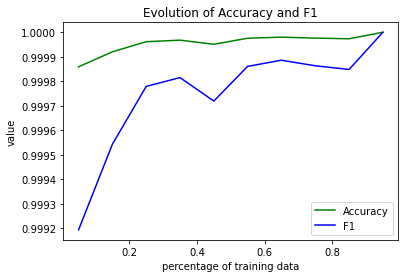

In [46]:
plt.plot(percentage, accuracy, 'g', label='Accuracy')
plt.plot(percentage, f1, 'b', label='F1')

plt.title("Evolution of Accuracy and F1")

plt.xlabel('percentage of training data')

plt.ylabel('value')

plt.legend()

plt.show()

#### Neural Networks <a class="anchor" id="nn2"></a>

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

mlp = MLPClassifier(hidden_layer_sizes=(4,4), activation='relu', solver='adam', max_iter=200)

f1 = []
accuracy = []
percentage = []


for i in range (10):
    (X_train,
    X_test,
    y_train,
    y_test) = train_test_split(X, Y, test_size=(0.05+i*0.1), random_state=1)
    
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    print("Percentage of training data :", 1 - (0.05 + i*0.1))

    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

    percentage.append(1-(0.05+i*0.1))

    f1.append(f1_score(y_test, y_pred))

    accuracy.append(accuracy_score(y_test, y_pred))

Percentage of training data : 0.95
Confusion matrix:
 [[45615    88]
 [  144  4153]]
Percentage of training data : 0.85
Confusion matrix:
 [[136528    310]
 [  1733  11430]]
Percentage of training data : 0.75
Confusion matrix:
 [[227253    824]
 [   595  21328]]
Percentage of training data : 0.6499999999999999
Confusion matrix:
 [[318277   1074]
 [  1856  28794]]
Percentage of training data : 0.55
Confusion matrix:
 [[409165   1353]
 [  1773  37709]]
Percentage of training data : 0.44999999999999996
Confusion matrix:
 [[497259   4676]
 [  6196  41869]]
Percentage of training data : 0.34999999999999987
Confusion matrix:
 [[591367   1856]
 [  3244  53534]]
Percentage of training data : 0.2499999999999999
Confusion matrix:
 [[680584   3866]
 [  2478  63073]]
Percentage of training data : 0.1499999999999999
Confusion matrix:
 [[772275   3356]
 [  1761  72609]]
Percentage of training data : 0.04999999999999993
Confusion matrix:
 [[858494   8413]
 [  3903  79191]]


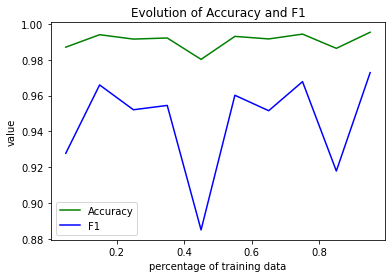

In [52]:
plt.plot(percentage, accuracy, 'g', label='Accuracy')
plt.plot(percentage, f1, 'b', label='F1')

plt.title("Evolution of Accuracy and F1")

plt.xlabel('percentage of training data')

plt.ylabel('value')

plt.legend()

plt.show()

#### K-NN <a class="anchor" id="knn2"></a>

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

f1 = []
accuracy = []
percentage = []


for i in range (10):
    (X_train,
    X_test,
    y_train,
    y_test) = train_test_split(X, Y, test_size=(0.05+i*0.1), random_state=1)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print("Percentage of training data :", 1 - (0.05 + i*0.1))

    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

    percentage.append(1-(0.05+i*0.1))

    f1.append(f1_score(y_test, y_pred))

    accuracy.append(accuracy_score(y_test, y_pred))

Percentage of training data : 0.95
Confusion matrix:
 [[45288   415]
 [  288  4009]]
Percentage of training data : 0.85
Confusion matrix:
 [[135504   1334]
 [   862  12301]]
Percentage of training data : 0.75
Confusion matrix:
 [[225717   2360]
 [  1473  20450]]
Percentage of training data : 0.6499999999999999
Confusion matrix:
 [[315886   3465]
 [  2247  28403]]
Percentage of training data : 0.55
Confusion matrix:
 [[405836   4682]
 [  3154  36328]]
Percentage of training data : 0.44999999999999996
Confusion matrix:
 [[495776   6159]
 [  4179  43886]]
Percentage of training data : 0.34999999999999987
Confusion matrix:
 [[585261   7962]
 [  5418  51360]]
Percentage of training data : 0.2499999999999999
Confusion matrix:
 [[674270  10180]
 [  7298  58253]]
Percentage of training data : 0.1499999999999999
Confusion matrix:
 [[762294  13337]
 [ 10266  64104]]
Percentage of training data : 0.04999999999999993
Confusion matrix:
 [[847226  19681]
 [ 17084  66010]]


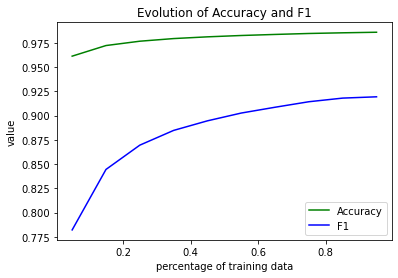

In [50]:
plt.plot(percentage, accuracy, 'g', label='Accuracy')
plt.plot(percentage, f1, 'b', label='F1')

plt.title("Evolution of Accuracy and F1")

plt.xlabel('percentage of training data')

plt.ylabel('value')

plt.legend()

plt.show()